### **Importing Packages**

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output 

#### The dataset is related to red and white variants of the **Portuguese "Vinho Verde" wine**. 

| **Column Name**          | **Description of Each Column**                   |
| -------------            | :---------------------------                     |
| fixed acidity            | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity          | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste   |
| citric acid               |found in small quantities, citric acid can add 'freshness' and flavor to wines   |
| residual sugar            | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet  |
| chlorides                 | the amount of salt in the wine                  |
| free sulfur dioxide       | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine            |
| total sulfur dioxide      | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density                   | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH                        |describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale     |
| sulphates                 | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant     |
| alcohol                   | the percent alcohol content of the wine       |   
| quality                   | output variable (based on sensory data, score between 0 and 10)                        |  


### **Loading Dataset**

In [42]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/gauravbatra14/Term-1/master/Data/Projects/winequality.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **Data Insights, stats and Visualization**

In [43]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [44]:
wine_df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##### Mean is less than median in almost all of features.

##### There are outliers in Free residual sugar & sulfur dioxide.

##### 6 ratings wine quality is the most of there in dataset.



In [45]:
wine_df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [46]:
wine_df.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

In [47]:
wine_df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [48]:
wine_df.groupby(['quality'])['alcohol'].sum()

quality
3      306.45
4     2198.90
5    21033.18
6    30026.30
7    12285.50
8     2254.00
9       60.90
Name: alcohol, dtype: float64

In [49]:
wine_df.groupby(['quality'])['alcohol'].mean()

quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64

#### **Heat Map for finding Co-relation**

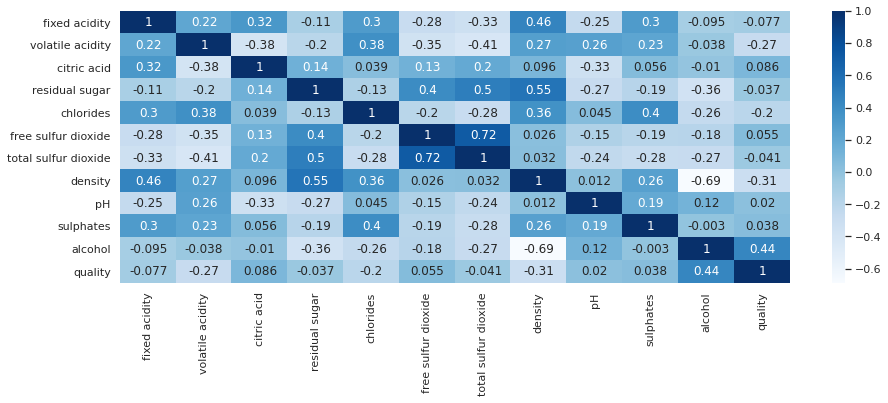

In [50]:
plt.figure(figsize=(15,5))
sns.heatmap(wine_df.corr(), annot = True, cmap='Blues')

##### Total Sulfur Dioxide and Free sulfur dioxide is very much co-related as both are having free form of SO2.

##### As residual sugar should ideally be less becasue if it will be higher then wine will be considered as sweet and its co-related with Total Sulfure Dioxide because it will also be maintained for maintaining the taste of wine.

##### Dark blues are highly co-related and white blues are negatively co-related.

#### **Box Plot for finding outlier values**

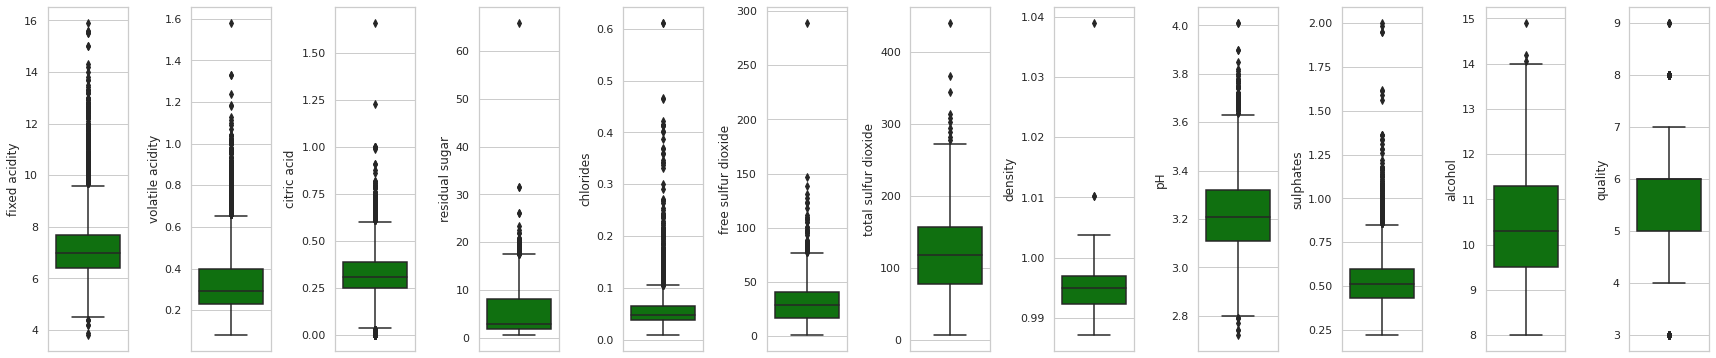

In [62]:
l = wine_df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(wine_df[l[i]],color='green',orient='v')
    plt.tight_layout()

#### **KDE plots for finding skewness in Data**

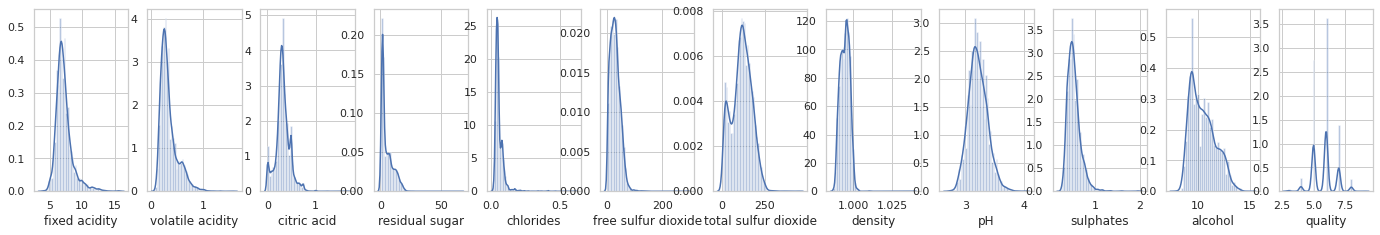

In [64]:
plt.figure(figsize=(2*number_of_columns,4*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(wine_df[l[i]],kde=True)

##### After looking at last two plots, there are outliers values in all features except alcohol.

##### All features are positive/ right skewed except **pH** as **pH** is **Normally distributed**

##### Alcohol percentage is at 10% and Quality of all wine is having 6 ratings.